In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from mlxtend.preprocessing import minmax_scaling

import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, mean_absolute_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelBinarizer

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import mutual_info_classif
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_selection import RFE
from sklearn.base import clone

np.set_printoptions(suppress = True) # no scientific notation

print("Setup complete!")

Setup complete!


In [2]:
df_heart = pd.read_csv('Data/heart.csv')
df_heart.shape

(303, 14)

In [3]:
df_heart.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df_heart.tail()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [5]:
df_heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
df_heart['age_groups'] = pd.cut(x=df_heart['age'], 
                          bins=[0, 2, 16, 30, 45, 116], 
                          labels=['Babies', 'Children', 'Young Adults', 'Middle-aged Adults', 'Old Adults'])

In [7]:
encoder = LabelBinarizer()
onehot = encoder.fit_transform(df_heart['age_groups'])
for j, class_ in enumerate(encoder.classes_):
    df_heart["c({})".format(class_)] = onehot[:, j]

del df_heart["age_groups"]

In [8]:
for j, _class in enumerate(encoder.classes_):
    print(j, _class)    
    print('c({})'.format(_class.replace('\x20', '_'))) # this is building out the column names
    # whitespaces ( ) are replaces with underscores (_)
    print("===================")

0 Middle-aged Adults
c(Middle-aged_Adults)
1 Old Adults
c(Old_Adults)
2 Young Adults
c(Young_Adults)


c:\Users\Thanh\anaconda3\envs\env\Lib\site-packages\mlxtend\preprocessing\scaling.py:40: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ary_new = ary_new[:, np.newaxis]
c:\Users\Thanh\anaconda3\envs\env\Lib\site-packages\mlxtend\preprocessing\scaling.py:40: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ary_new = ary_new[:, np.newaxis]
c:\Users\Thanh\anaconda3\envs\env\Lib\site-packages\mlxtend\preprocessing\scaling.py:40: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ary_new = ary_new[:, np.newaxis]


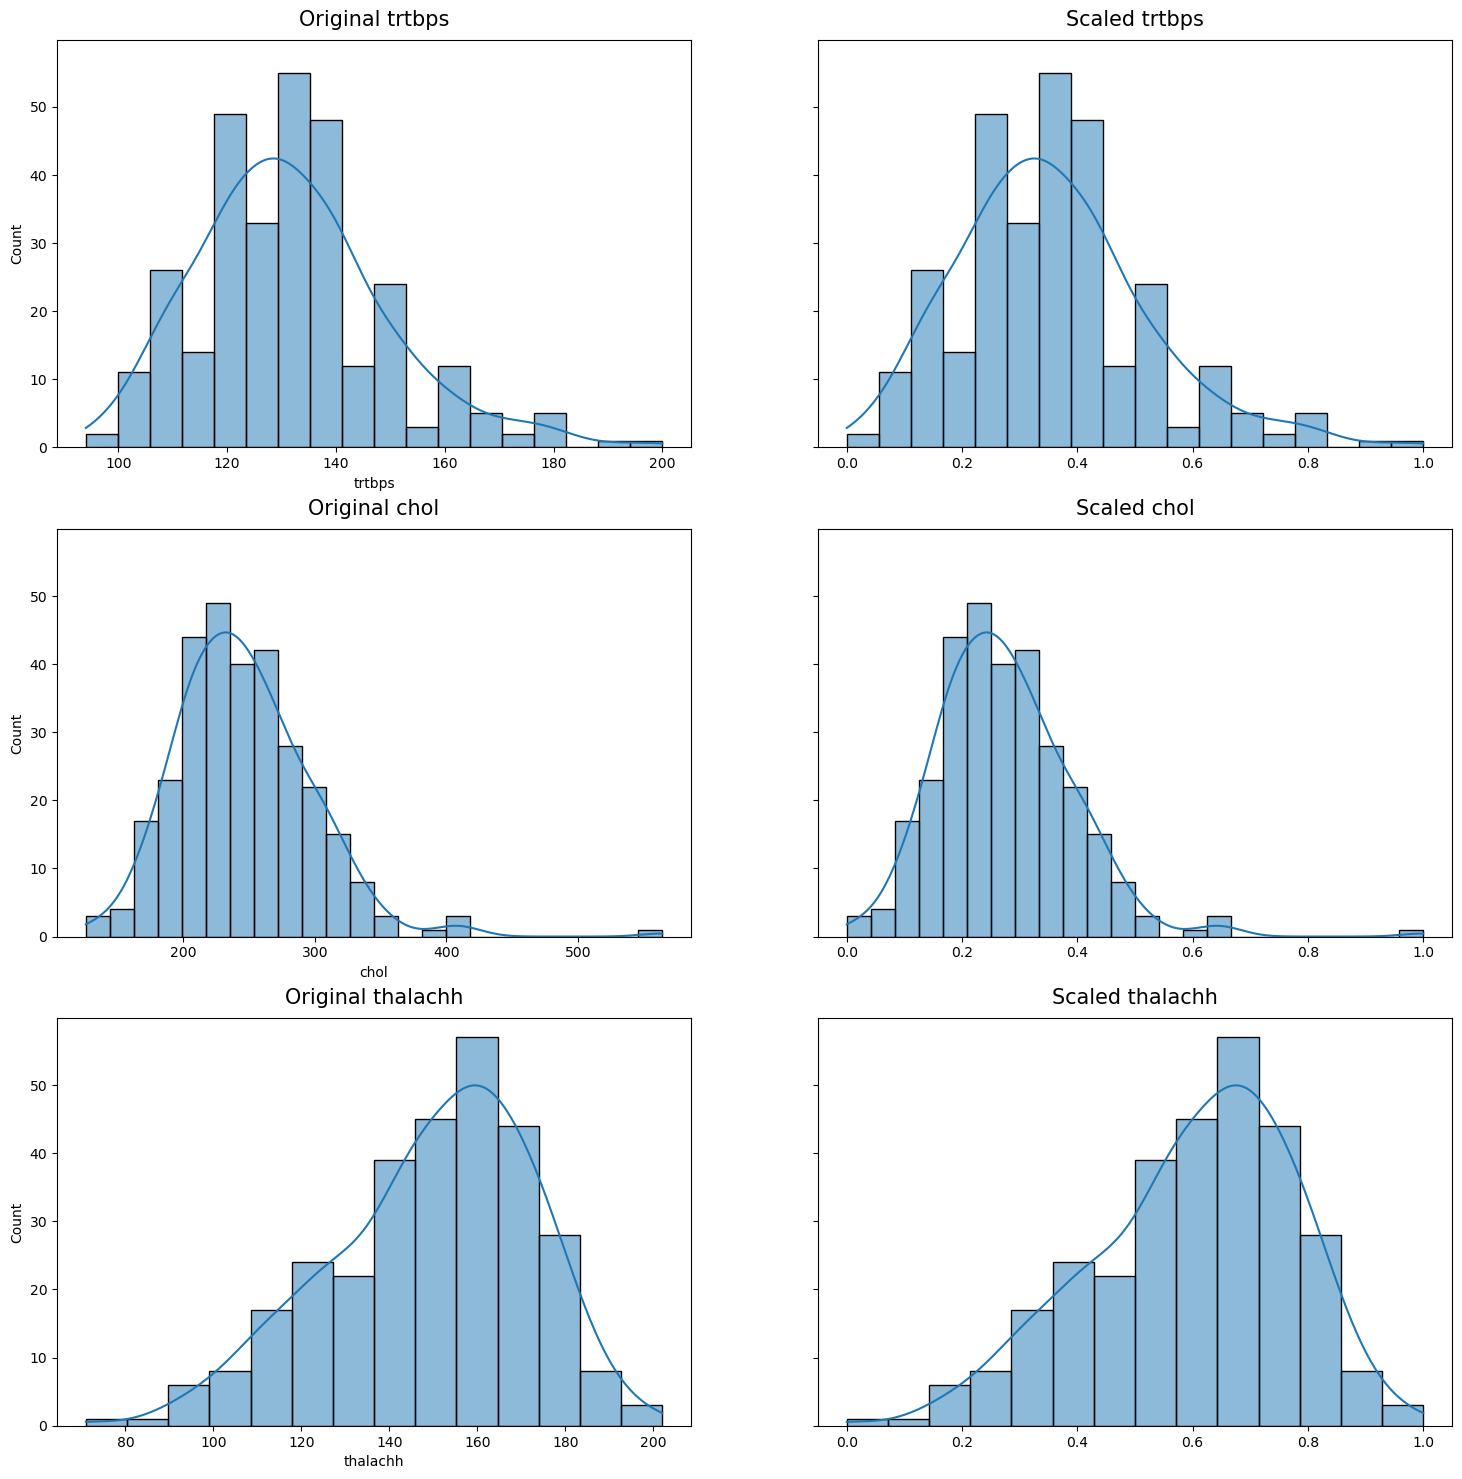

In [9]:
fig, ax = plt.subplots(3,2, figsize = (18,18), sharey=True)
columns = ['trtbps', 'chol', 'thalachh']

for i, column in enumerate(columns):
    original_data = df_heart[column]
    scaled_data = minmax_scaling(original_data, columns=[0])
    df_heart[f'scaled_{column}'] = scaled_data
    
    sns.histplot(original_data, ax=ax[i, 0], kde=True, legend=False)
    ax[i, 0].set_title(f"Original {column}", pad=10, fontsize=15)
    sns.histplot(scaled_data, ax=ax[i, 1], kde=True, legend=False)
    ax[i, 1].set_title(f"Scaled {column}", pad=10, fontsize=15)
    
plt.show()

In [10]:
df_heart.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output,c(Middle-aged Adults),c(Old Adults),c(Young Adults),scaled_trtbps,scaled_chol,scaled_thalachh
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,0,1,0,0.481132,0.244292,0.603053
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,1,0,0,0.339623,0.283105,0.885496
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,1,0,0,0.339623,0.178082,0.770992
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,0,1,0,0.245283,0.251142,0.816794
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,0,1,0,0.245283,0.520548,0.702290


In [11]:
X_full = df_heart.copy()
X_full.dropna(axis=0, subset=['output'], inplace=True)
y = np.array(X_full['output'])
X_full.drop(['output'], axis=1, inplace=True)

X = np.array(X_full)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [12]:
model = DecisionTreeClassifier(criterion='entropy', random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy score: {round(accuracy, 2)}")

Accuracy score: 0.79


In [13]:
forest_model = RandomForestClassifier(n_estimators=50, random_state=0)
forest_model.fit(X_train, y_train)
y_pred = forest_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy score: {round(accuracy, 2)}")

Accuracy score: 0.84


In [14]:
model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy score: {round(accuracy, 2)}")

Accuracy score: 0.72


In [15]:
def mutual_info_session(X_train, y_train, X_test, y_test, k, df):
    selector = SelectKBest(score_func=mutual_info_classif, k=k)
    selector.fit(X_train, y_train)    
    
    selected_feature_columns = np.array(df.columns[selector.get_support(True)])
    
    model = GaussianNB()
    model.fit(selector.transform(X_train), y_train)
    
    selected_model_score = model.score(selector.transform(X_test), y_test)
    
    return k, selected_feature_columns, selected_model_score

print("MUTUAL INFO METHOD:\n")
result = []
highest_score = 0.0
mu_best_k = None
mu_best_features = None

for i in range(1, 16):
    k, selected_feature_columns, selected_model_score = mutual_info_session(X_train, y_train, X_test, y_test, i, X_full)
    result.append((k, selected_feature_columns, selected_model_score))
    
    if selected_model_score > highest_score:
        highest_score = selected_model_score
        mu_best_k = k
        mu_best_features = selected_feature_columns

print("Highest Model Score:", highest_score)
print("Best k:", mu_best_k)
print("Best Selected Features:", mu_best_features)


MUTUAL INFO METHOD:

Highest Model Score: 0.8524590163934426
Best k: 4
Best Selected Features: ['cp' 'exng' 'caa' 'thall']


In [16]:
def chi_feature_session(X_train, y_train, X_test, y_test, k, df):
    selector = SelectKBest(score_func=chi2, k=k)
    selector.fit(X_train, y_train)    
    
    selected_feature_columns = np.array(df.columns[selector.get_support(True)])
    
    model = GaussianNB()
    model.fit(selector.transform(X_train), y_train)
    
    # Assuming X_test and y_test are available in the global scope
    selected_model_score = model.score(selector.transform(X_test), y_test)
    
    return k, selected_feature_columns, selected_model_score

print("CHI SQUARE METHOD: \n")
result = []
highest_score = 0.0  # Initialize the highest score
chi_best_k, chi_best_features = None, None

for i in range(1, 16):
    k, selected_feature_columns, selected_model_score = chi_feature_session(X_train, y_train, X_test, y_test, k, X_full)
    result.append((k, selected_feature_columns, selected_model_score))
    
    if selected_model_score > highest_score:
        highest_score = selected_model_score
        chi_best_k = k
        chi_best_features = selected_feature_columns

print("Highest Model Score:", highest_score)
print("Best k:", chi_best_k)
print("Best Selected Features:", chi_best_features)


CHI SQUARE METHOD: 

Highest Model Score: 0.7049180327868853
Best k: 15
Best Selected Features: ['age' 'sex' 'cp' 'trtbps' 'chol' 'thalachh' 'exng' 'oldpeak' 'slp' 'caa'
 'thall' 'c(Middle-aged Adults)' 'c(Old Adults)' 'c(Young Adults)'
 'scaled_thalachh']


In [17]:
class ForwardSelector(object):
    def __init__(self, estimator):
        self.estimator = estimator

    def fit(self, X, y, k):
        selected = np.zeros(X.shape[1]).astype(bool)  # holds indicators of whether each feature is selected

        score = lambda X_features: clone(self.estimator).fit(X_features, y).score(X_features, y)
        selected_indices = lambda: list(np.flatnonzero(selected))

        while np.sum(selected) < k:
            rest_indices = list(np.flatnonzero(~selected))  # indices of unselected columns
            scores = []

            for i in rest_indices:
                feature_subset = selected_indices() + [i]
                s = score(X[:, feature_subset])
                scores.append(s)

            idx_to_add = rest_indices[np.argmax(scores)]
            selected[idx_to_add] = True

        self.selected = selected.copy()
        return self

    def transform(self, X):
        return X[:, self.selected]

    def get_support(self, indices=False):
        return np.flatnonzero(self.selected) if indices else self.selected

def forward_selection_session(X_train, y_train, X_test, y_test, k, df):
    model = GaussianNB()
    selector = ForwardSelector(model)
    selector.fit(X_train, y_train, k)
    
    selected_feature_columns = np.array(df.columns[selector.get_support(True)])
    
    model = GaussianNB()
    model.fit(selector.transform(X_train), y_train)
    
    selected_model_score = model.score(selector.transform(X_test), y_test)
    
    return k, selected_feature_columns, selected_model_score

print("FORWARD SELECTION METHOD:\n")
result = []
highest_score = 0.0
forward_best_k = None
forward_best_features = None

for i in range(1, 16):
    k, selected_feature_columns, selected_model_score = forward_selection_session(X_train, y_train, X_test, y_test, i, X_full)
    result.append((k, selected_feature_columns, selected_model_score))
    
    if selected_model_score > highest_score:
        highest_score = selected_model_score
        forward_best_k = k
        forward_best_features = selected_feature_columns

print("Highest Model Score:", highest_score)
print("Best k:", forward_best_k)
print("Best Selected Features:", forward_best_features)


FORWARD SELECTION METHOD:

Highest Model Score: 0.8688524590163934
Best k: 6
Best Selected Features: ['sex' 'cp' 'restecg' 'oldpeak' 'caa' 'thall']


In [18]:
selected_feature_columns = list(set(mu_best_features)|set(forward_best_features))
selected_feature_indices = [X_full.columns.get_loc(col) for col in selected_feature_columns]
print(selected_feature_columns)
print(selected_feature_indices)

['thall', 'cp', 'exng', 'restecg', 'oldpeak', 'caa', 'sex']
[12, 2, 8, 6, 9, 11, 1]


In [19]:
X_train = X_train[:, selected_feature_indices]
print(X_train.shape)
X_test = X_test[:, selected_feature_indices]
print(X_test.shape)

(242, 7)
(61, 7)


In [20]:
model = DecisionTreeClassifier(criterion='entropy', random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy score: {round(accuracy, 2)}")

Accuracy score: 0.82


In [21]:
max_depths = [None, 2, 5, 10 , 20, 50, 100]
for depth in max_depths:
    model = DecisionTreeClassifier(criterion='entropy', max_depth=depth, random_state=0)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Max depth: {depth} -> Accuracy score: {accuracy}')

Max depth: None -> Accuracy score: 0.819672131147541
Max depth: 2 -> Accuracy score: 0.7377049180327869
Max depth: 5 -> Accuracy score: 0.7868852459016393
Max depth: 10 -> Accuracy score: 0.8360655737704918
Max depth: 20 -> Accuracy score: 0.819672131147541
Max depth: 50 -> Accuracy score: 0.819672131147541
Max depth: 100 -> Accuracy score: 0.819672131147541


In [22]:
forest_model = RandomForestClassifier(random_state=1)
forest_model.fit(X_train, y_train)
y_pred = forest_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy score: {round(accuracy, 2)}")

Accuracy score: 0.77


In [23]:
# Define the models
model_1 = RandomForestClassifier(n_estimators=50, random_state=0)
model_2 = RandomForestClassifier(n_estimators=100, random_state=0)
model_3 = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=0)
model_4 = RandomForestClassifier(n_estimators=200, min_samples_split=20, random_state=0)
model_5 = RandomForestClassifier(n_estimators=100, max_depth=7, random_state=0)

models = [model_1, model_2, model_3, model_4, model_5]

for i, model in enumerate(models):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy score of model_{i+1}: {round(accuracy, 2)}")

Accuracy score of model_1: 0.82
Accuracy score of model_2: 0.84
Accuracy score of model_3: 0.8
Accuracy score of model_4: 0.85
Accuracy score of model_5: 0.82


In [24]:
best_features = ['sex', 'cp', 'thall', 'oldpeak', 'slp', 'restecg', 'exng', 'caa']

primary_model = RandomForestClassifier(n_estimators=200, min_samples_split=20, random_state=0)
primary_model.fit(X_train, y_train)
y_pred = primary_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy score: {round(accuracy, 3)}")

print("Number of mislabeled points out of a total {} points : {}"
      .format(len(X_test),(y_test != y_pred).sum()))

Accuracy score: 0.852
Number of mislabeled points out of a total 61 points : 9
